# Dados


In [ ]:
#Importações
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from google.colab import files
import sklearn

In [ ]:
#Importando a Database
df = pd.read_csv("/content/apartments_for_rent_classified_100K.csv",sep=";", encoding='cp1252')

#Printando para avaliar a importação
df.head()

/tmp/ipython-input-38-2598792375.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/apartments_for_rent_classified_100K.csv",sep=";", encoding='cp1252')


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [ ]:
#Adquirir dados básicos da tabela para visualização

# Formato do dataframe
formato = df.shape

# Tamanho do dataframe
tamanho = df.size

# Número de Instâncias no dataframe
num_ins = len(df)

print('Formato do dataframe: ', formato)
print('Tamanho do dataframe: ', tamanho)
print('Número de Instâncias: ', num_ins)

Formato do dataframe:  (99492, 22)
Tamanho do dataframe:  2188824
Número de Instâncias:  99492


In [ ]:
#Count para avaliar possíveis diferenças entre as colunas e a falta de dados
df.count()

,0
id,99492
category,99492
title,99492
body,99492
amenities,83448
bathrooms,99429
bedrooms,99368
currency,99492
fee,99492
has_photo,99492


# 1. Seleção de Atributos

In [ ]:
df['body']

,body
0,"This unit is located at 507 & 509 Esplanade, R..."
1,"This unit is located at 146 Lochview Drive, Ne..."
2,This unit is located at 3101 Morningside Drive...
3,"This unit is located at 209 Aegean Way, Vacavi..."
4,"This unit is located at 4805 Marquette NE, Alb..."
...,...
99487,"Redefining urban living, in southeast Houston,..."
99488,Courtney Manor Apartments offer the best of ev...
99489,"Fully remodeled, new floor, kitchen cabinet, s..."
99490,"Amenities include a fitness facilities, swimmi..."


In [ ]:
feat_list = ['category', 'price_display', 'title', 'source']
for f in feat_list:
  print(df[f].value_counts())
  print("-----")

category
housing/rent/apartment            99431
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/short_term               4
housing/rent/home                     4
housing/rent/condo                    3
housing/rent/other                    1
Name: count, dtype: int64
-----
price_display
$1,350    574
$850      547
$1,200    538
$950      528
$1,100    522
         ... 
$496        1
$4,397      1
$4,003      1
$6,420      1
$4,165      1
Name: count, Length: 3718, dtype: int64
-----
title
Apartment in great location                                                  1064
Apartment in prime location                                                  1028
Apartment in quiet area, spacious with big kitchen                           1023
Super Cute! Apartment for Rent!                                              1018
This Apartment is a must see!                                                1002
                                                 

In [ ]:
feat_list2 = ['address', 'currency', 'fee', 'price_type']
for f in feat_list2:
  print(df[f].value_counts())
  print("-----")

address
8215 S.W 72nd Avenue        19
2647 Eastgate Road           8
901 Valley View Circle       7
5903 Danny Kaye Drive        6
700 Watkins Ave              6
                            ..
1616 Anthony St              1
714 N 95th St                1
8350 Wingate Dr #912         1
1201 Kensington Ln           1
4215 Brockmont Avenue NE     1
Name: count, Length: 7771, dtype: int64
-----
currency
USD    99492
Name: count, dtype: int64
-----
fee
No     99291
Yes      201
Name: count, dtype: int64
-----
price_type
Monthly           99488
Weekly                3
Monthly|Weekly        1
Name: count, dtype: int64
-----


In [ ]:
#Inicialmente retiramos as colunas que são redundantes ou irrelevantes
df.drop(columns=['category', 'body', 'price_display', 'title', 'address', 'currency', 'fee'], inplace=True)

# Tratando atributo price_type:
df = df[df['price_type'] == 'Monthly'] # Removendo linhas com valores "Weekly" e "Monthly|Weekly" na coluna price_type
df.drop(columns=['price_type'], inplace=True) # Removendo a coluna 'price_type'

/tmp/ipython-input-44-191488167.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['price_type'], inplace=True) # Removendo a coluna 'price_type'


# 2. Completude e Redundância de Dados



## 2.1. Tratando Dados Ausentes

In [ ]:
#Verificando valores ausentes
print("\nContagem de valores ausentes por coluna:")
print(df.isnull().sum())


Contagem de valores ausentes por coluna:
id                  0
amenities       16044
bathrooms          62
bedrooms          123
has_photo           0
pets_allowed    60422
price               1
square_feet         0
cityname          302
state             302
latitude           25
longitude          25
source              0
time                0
dtype: int64


In [ ]:
# Removendo as linhas onde a coluna 'latitude' tem valor 'null'
df = df.dropna(subset=['latitude'])
# Removendo as linhas onde a coluna 'longitude' tem valor 'null'
df = df.dropna(subset=['longitude'])
# Removendo as linhas onde a coluna 'cityname' tem valor 'null'
df = df.dropna(subset=['cityname'])
# Removendo as linhas onde a coluna 'state' tem valor 'null'
df = df.dropna(subset=['state'])
# Removendo as linhas onde a coluna 'price' tem valor 'null'
df = df.dropna(subset=['price'])
# Substituindo valores nulos na coluna 'bathrooms' por 0
df['bathrooms'] = df['bathrooms'].fillna(0)
# Substituindo valores nulos na coluna 'bedrooms' por 0
df['bedrooms'] = df['bedrooms'].fillna(0)

#Verificando o tratamento de valores ausentes
print("\nContagem de valores ausentes por coluna:")
print(df.isnull().sum())


Contagem de valores ausentes por coluna:
id                  0
amenities       15909
bathrooms           0
bedrooms            0
has_photo           0
pets_allowed    60249
price               0
square_feet         0
cityname            0
state               0
latitude            0
longitude           0
source              0
time                0
dtype: int64


## 2.2. Tratando Instâncias Duplicadas



In [ ]:
# Verificando se existem linhas duplicadas
duplicated_rows = df.duplicated().sum()
print(f"Número de linhas duplicadas: {duplicated_rows}")

Número de linhas duplicadas: 84


In [ ]:
# Removendo linhas duplicadas
df = df.drop_duplicates()

# Verificando novamente se existem linhas duplicadas
duplicated_rows_after = df.duplicated().sum()
print(f"Número de linhas duplicadas após remoção: {duplicated_rows_after}")

Número de linhas duplicadas após remoção: 0


# 3. Dados estatísticos (Medidas de Posição, Z-Score, Quartis, IQR e Outliers)

In [ ]:
# Preço é o atributo alvo
feature = 'price'

## 3.1. Medidas de Posição

In [ ]:
# Média simples
feature = 'price'
mediaSimples = df[feature].mean()

# Moda
moda = stats.mode(df[feature],keepdims=True)

# Mediana
mediana = np.median(df[feature])


print('Média Simples: ', mediaSimples)
print('Mediana: ', mediana)
print('Moda - Elemento: ', moda[0][0])
print('Moda - Frequência: ', moda[1][0])

Média Simples:  1525.4564029626342
Mediana:  1350.0
Moda - Elemento:  1350.0
Moda - Frequência:  572


<Axes: ylabel='Density'>

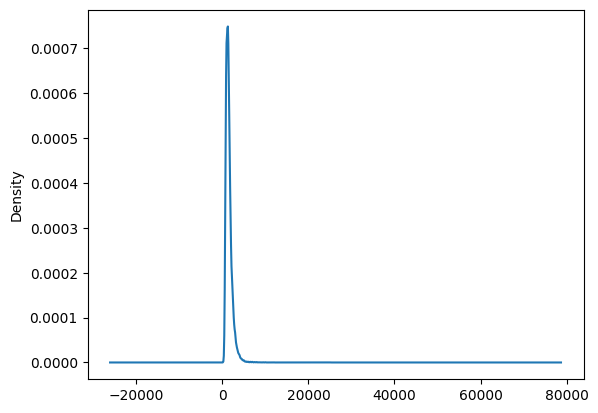

In [ ]:
df['price'].plot(kind='kde')

In [ ]:
feat_list3 = ['bathrooms' , 'bedrooms']
for f in feat_list3:
  print(f'Proporção para a feature {f}: {df[f].mean()}')
  print("-----")

Proporção para a feature bathrooms: 1.444536382074853
-----
Proporção para a feature bedrooms: 1.7261783433063238
-----


## 3.2. Medidas de Dispersão

### 3.2.1. Z-Score



In [ ]:
# cálculo do z-score da feature
z = stats.zscore(df[feature])

# z-score
print('Z-Score')
print(z)


Z-Score
[ 0.74114434 -0.30491361 -0.14440736 ... -0.22189314 -0.65802735
  0.07698056]


In [ ]:
sorted(stats.zscore(df['price']).__array__(), reverse=True)

[np.float64(56.425742559084796),
 np.float64(42.58899715211752),
 np.float64(37.054298989330604),
 np.float64(37.054298989330604),
 np.float64(37.054298989330604),
 np.float64(35.02306476358781),
 np.float64(33.733480091658464),
 np.float64(31.519600826543698),
 np.float64(30.966131010265006),
 np.float64(30.966131010265006),
 np.float64(30.412661193986317),
 np.float64(25.984902663756788),
 np.float64(25.984902663756788),
 np.float64(25.984902663756788),
 np.float64(25.984902663756788),
 np.float64(25.87420870050105),
 np.float64(23.771023398642022),
 np.float64(20.45020450096988),
 np.float64(19.896734684691186),
 np.float64(19.896734684691186),
 np.float64(17.12938560329773),
 np.float64(17.12938560329773),
 np.float64(15.316218485168738),
 np.float64(14.915506338182967),
 np.float64(14.915506338182967),
 np.float64(14.915506338182967),
 np.float64(14.915506338182967),
 np.float64(14.860159356555098),
 np.float64(14.74946539329936),
 np.float64(14.583424448415752),
 np.float64(14.36

### 3.2.2. Quartis e IQR

In [ ]:
# usando DataFrame
Q1df = df[feature].quantile(0.25)
Q2df = df[feature].quantile(0.50)
Q3df = df[feature].quantile(0.75)
print('Q1: ', Q1df)
print('Q2: ', Q2df)
print('Q3: ', Q3df)

IQRdf = Q3df - Q1df
print('IQR: ', IQRdf)

Q1:  1012.0
Q2:  1350.0
Q3:  1795.0
IQR:  783.0


In [ ]:
# IQR
print(stats.iqr(df[feature]))

783.0


### 3.2.3. Outliers

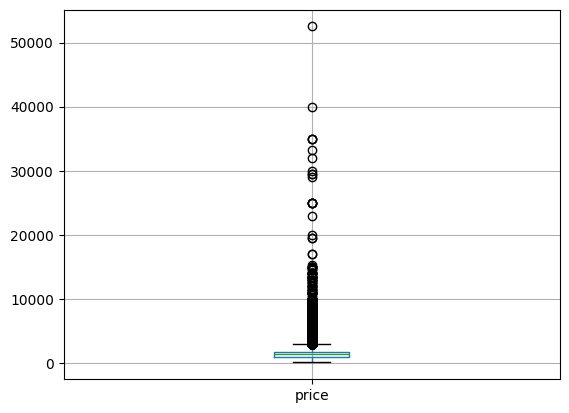

In [ ]:
boxplot = df.boxplot(column=feature)

In [ ]:
# Limite Inferior
Inferior = Q1df - 1.5 * IQRdf
print('Limite Inferior: ', Inferior)

# Ouliers - Inferior
outlierInf = df.loc[df[feature] <= Inferior]
indicesOutlierInf = outlierInf.index
print('Ouliers - Inferior')
print(df[feature].loc[indicesOutlierInf])

# Limite Superior
Superior = Q3df + 1.5 * IQRdf
print('Limite Superior: ', Superior)

# Outliers - Superior
outlierSup = df.loc[df[feature] >= Superior]
indicesOutlierSup = outlierSup.index

print('Outliers - Superior')
print(df[feature].loc[indicesOutlierSup])

Limite Inferior:  -162.5
Ouliers - Inferior
Series([], Name: price, dtype: float64)
Limite Superior:  2969.5
Outliers - Superior
11       3195.0
13       7800.0
28       3250.0
38       4500.0
39       3990.0
          ...  
99469    4326.0
99471    3200.0
99480    4495.0
99483    3200.0
99485    4395.0
Name: price, Length: 4621, dtype: float64


In [ ]:
Q4df = np.quantile(df[feature], 0.95)
print('Q4: ', Q4df)

IQRdf = Q3df - Q1df

Superior = Q4df + 1.5 * IQRdf
print('Limite Superior: ', Superior)

# Outliers - Superior
outlierSup = df.loc[df[feature] >= Superior]
indicesOutlierSup = outlierSup.index

print('Outliers - Superior')
print(df[feature].loc[indicesOutlierSup])

Q4:  2914.0
Limite Superior:  4088.5
Outliers - Superior
13       7800.0
38       4500.0
42       4950.0
43       4950.0
90       6500.0
          ...  
98891    4595.0
99439    4200.0
99469    4326.0
99480    4495.0
99485    4395.0
Name: price, Length: 1166, dtype: float64


# 4. Remoção de Outliers



In [ ]:
# Print the updated DataFrame
print(f"Antes de tirar os outliers: {df.shape}")

# Calculate the Z-score for the 'price' column
df['z_score_price'] = np.abs(stats.zscore(df['price']))

# Remove instances with a Z-score greater than or equal to 3
df = df[df['z_score_price'] < 3]

# Drop the 'z_score_price' column if you no longer need it
df.drop(columns=['z_score_price'], inplace=True)

# Print the updated DataFrame
print(f"Depois de tirar os outliers: {df.shape}")

Antes de tirar os outliers: (99101, 14)
Depois de tirar os outliers: (98102, 14)


/tmp/ipython-input-60-3967585443.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['z_score_price'], inplace=True)


In [ ]:
# Verificando o tamanho do DataFrame antes da remoção dos outliers
print(f'Tamanho do DataFrame com outliers: {df.shape}')

# Identificando os índices dos outliers
outlier_indices = df[(df[feature] <= Inferior) | (df[feature] >= Superior)].index

# Removendo os outliers diretamente do DataFrame original
df.drop(outlier_indices, inplace=True)

# Verificando o tamanho do DataFrame após a remoção dos outliers
print(f'Tamanho do DataFrame sem outliers: {df.shape}')

Tamanho do DataFrame com outliers: (98102, 14)
Tamanho do DataFrame sem outliers: (97935, 14)


/tmp/ipython-input-61-3589118187.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outlier_indices, inplace=True)


# 5. Transformação dos Dados

## 5.1. Tratamento das Colunas

### 5.1.1 Coluna amenities

In [ ]:
#Função usando o get_dummies para criar os dummmies através da vírgula
def make_dummies(df, col, remove=True):
    df[col] = df[col].str.strip()
    df = pd.concat([df, df[col].str.get_dummies(sep=',')], axis=1)
    if remove==True:
        df = df.drop([col], axis=1)
    return df

In [ ]:
#Resolver o amenities

df = make_dummies(df, 'amenities')
df.head()

/tmp/ipython-input-62-587384755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.strip()


,id,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,...,Patio/Deck,Playground,Pool,Refrigerator,Storage,TV,Tennis,View,Washer Dryer,Wood Floors
0,5668640009,1.0,1.0,Thumbnail,Cats,2195.0,542,Redondo Beach,CA,33.8520,...,0,0,0,0,0,0,0,0,0,0
1,5668639818,1.5,3.0,Thumbnail,"Cats,Dogs",1250.0,1500,Newport News,VA,37.0867,...,0,0,0,0,0,0,0,0,0,0
2,5668639686,2.0,3.0,Thumbnail,NaN,1395.0,1650,Raleigh,NC,35.8230,...,0,0,0,0,0,0,0,0,0,0
3,5668639659,1.0,2.0,Thumbnail,"Cats,Dogs",1600.0,820,Vacaville,CA,38.3622,...,0,0,0,0,0,0,0,0,0,0
4,5668639374,1.0,1.0,Thumbnail,"Cats,Dogs",975.0,624,Albuquerque,NM,35.1038,...,0,0,0,0,0,0,0,0,0,0


### 5.1.2 Coluna pets_allowed

In [ ]:
# Criando duas novas colunas 'dogs' e 'cats' com o valor padrão 0
df['dogs'] = 0
df['cats'] = 0

# Substituindo 0 por 1 nas colunas 'cats' e 'dogs' onde 'pets_allowed' é "Cats,Dogs"
df.loc[df['pets_allowed'] == 'Cats,Dogs', ['cats', 'dogs']] = 1

# Substituindo 0 por 1 na coluna 'cats' onde 'pets_allowed' é "Cats"
df.loc[df['pets_allowed'] == 'Cats', ['cats']] = 1

# Substituindo 0 por 1 nas colunas 'dogs' onde 'pets_allowed' é "Dogs"
df.loc[df['pets_allowed'] == 'Dogs', ['dogs']] = 1

# Removendo coluna 'pets_allowed'
df.drop(columns=['pets_allowed'], inplace=True)

### 5.1.3 Coluna has_photo

In [ ]:
#Categorizando a coluna de fotos
df["has_photo"] = df["has_photo"].replace(["No"], 0)
df["has_photo"] = df["has_photo"].replace(["Thumbnail"], 1)
df["has_photo"] = df["has_photo"].replace(["Yes"], 2)

/tmp/ipython-input-65-1703024704.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["has_photo"] = df["has_photo"].replace(["Yes"], 2)


###5.1.4 Colunas longitude e latitude

In [ ]:
import sklearn

#Descomente o scaler desejado
#scaler = sklearn.MinMaxScaler()
#scaler = sklearn.RobustScaler()
#df[['latitude', 'longitude']] = scaler.fit_transform(df[['latitude', 'longitude']])

# 6. Mostrando o resultado final

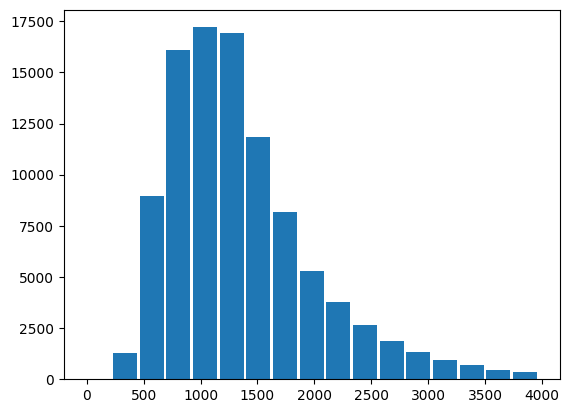

In [ ]:
plt.hist(df[feature], align='left', bins=17, rwidth=0.9)
plt.savefig('a.png')
plt.show()

In [ ]:
# ver numero de instâncias por atributo
df.count()

,0
id,97935
bathrooms,97935
bedrooms,97935
has_photo,97935
price,97935
square_feet,97935
cityname,97935
state,97935
latitude,97935
longitude,97935


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97935 entries, 0 to 99491
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  97935 non-null  int64  
 1   bathrooms           97935 non-null  float64
 2   bedrooms            97935 non-null  float64
 3   has_photo           97935 non-null  int64  
 4   price               97935 non-null  float64
 5   square_feet         97935 non-null  int64  
 6   cityname            97935 non-null  object 
 7   state               97935 non-null  object 
 8   latitude            97935 non-null  float64
 9   longitude           97935 non-null  float64
 10  source              97935 non-null  object 
 11  time                97935 non-null  int64  
 12  AC                  97935 non-null  int64  
 13  Alarm               97935 non-null  int64  
 14  Basketball          97935 non-null  int64  
 15  Cable or Satellite  97935 non-null  int64  
 16  Clubhouse

<Axes: ylabel='Density'>

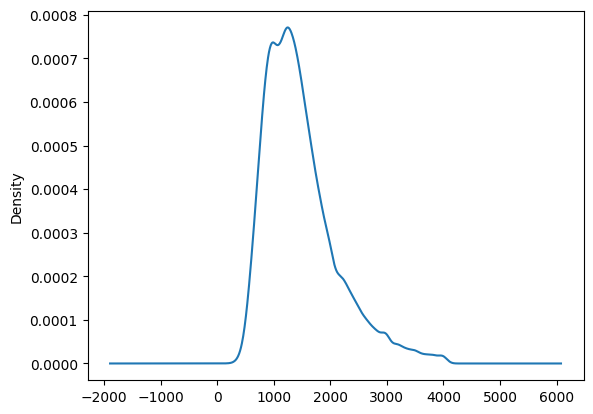

In [ ]:
df['price'].plot(kind='kde')

In [ ]:
# Gerando o arquivo CSV da base pós-processamento
df.to_csv('apartments_processed.csv', index=False)

# Baixando o arquivo gerado
files.download('apartments_processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>